In [11]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

MASSPOLE = 0.1
MASSCART = 100.0 # The original mass is 1.0. Set to 100 to avoid card displacement
GRAVITY = 9.8
TOTAL_MASS = (MASSPOLE + MASSCART)
LENGTH = 0.5
POLEMASS_LENGTH = (MASSPOLE * LENGTH)
FOURTHIRDS = 1.3333333333333
TAU = 0.02

In [6]:
# Orginal verion
def cart_pole(v):
    x = v[0]
    x_dot = v[1]
    theta = v[2]
    theta_dot = v[3]
    force = 0
    costheta = math.cos(theta)
    sintheta = math.sin(theta)

    temp = (force + POLEMASS_LENGTH * theta_dot * theta_dot * sintheta) / TOTAL_MASS

    thetaacc = (GRAVITY * sintheta - costheta * temp) / (LENGTH * (FOURTHIRDS - MASSPOLE * costheta * costheta / TOTAL_MASS))

    xacc  = temp - POLEMASS_LENGTH * thetaacc* costheta / TOTAL_MASS

    v[0] = x + TAU * x_dot
    v[1] = x_dot + TAU * xacc
    v[2] = theta + TAU * theta_dot
    v[3] = theta_dot + TAU * thetaacc

In [7]:
# Modify to work with force = 0.
def cart_pole_v2(v):
    x = v[0]
    x_dot = v[1]
    theta = v[2]
    theta_dot = v[3]
    force = 0
    costheta = math.cos(theta)
    sintheta = math.sin(theta)

    temp = (force + POLEMASS_LENGTH * theta_dot * theta_dot * sintheta) / TOTAL_MASS

    thetaacc = (GRAVITY * sintheta - costheta * temp) / (LENGTH * (FOURTHIRDS - MASSPOLE * costheta * costheta / TOTAL_MASS))

    xacc  = temp - POLEMASS_LENGTH * thetaacc* costheta / TOTAL_MASS

    # Reorder the update x, x_dot, theta and theta_dot
    v[1] = x_dot + TAU * xacc
    v[0] = x + TAU *  v[1]
    v[3] = theta_dot + TAU * thetaacc
    v[2] = theta + TAU * v[3]

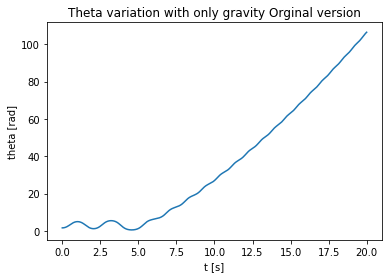

In [12]:
# initial start value. No speed
v = [0, 0, math.pi/2, 0.0]

all_theta = []
nbstep = 1000
for _ in range(nbstep):
    all_theta.append(v[2])
    cart_pole(v)

t = np.linspace(0, nbstep*TAU, nbstep)
plt.plot(t, all_theta)
plt.xlabel('t [s]')
plt.ylabel('theta [rad]')

plt.title("Theta variation with only gravity Orginal version")
plt.show()

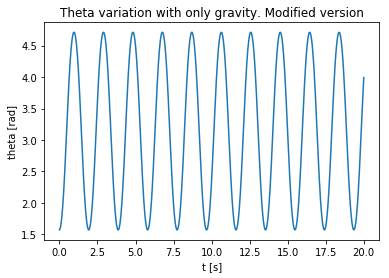

In [13]:
# initial start value. No speed
v = [0, 0, math.pi/2, 0.0]

all_theta = []
nbstep = 1000
for _ in range(nbstep):
    all_theta.append(v[2])
    cart_pole_v2(v)

t = np.linspace(0, nbstep*TAU, nbstep)
plt.plot(t, all_theta)
plt.xlabel('t [s]')
plt.ylabel('theta [rad]')

plt.title("Theta variation with only gravity. Modified version")
plt.show()